<a href="https://colab.research.google.com/github/tnc-br/ddf-isoscapes/blob/dropout_rate/vi_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variational model

Find the mean/variance of O18 ratios (as well as N15 and C13 in the future) at a particular lat/lon across Brazil.

In [1]:
import importlib
from datetime import datetime
import sys
import os

# Import libraries required

In [ ]:
!if [ ! -d "/content/ddf_common_stub" ] ; then git clone -b test https://github.com/tnc-br/ddf_common_stub.git; fi
sys.path.append("/content/ddf_common_stub/")
import ddfimport
ddfimport.ddf_source_control_pane()

In [13]:
import train_variational_inference_model as tvim
import raster
import model
import importlib
importlib.reload(tvim)
importlib.reload(raster)
importlib.reload(model)

<module 'model' from '/content/gdrive/MyDrive/dropout_rate/ddf_common/model.py'>

# Model configuration

In [10]:
params = tvim.VIModelTrainingParams(
    training_id = "test-2024-07-26", #@param
    num_epochs = 5000, #@param
    num_layers = 2, #@param
    num_nodes_per_layer = 20, #@param
    training_batch_size = 5, #@param
    learning_rate = 0.0001, #@param
    mean_label = "d18O_cel_mean", #@param
    var_label = "d18O_cel_variance", #@param
    early_stopping_patience = 100, #@param
    double_sided_kl = False, #@param
    kl_num_samples_from_pred_dist = 15, #@param
    dropout_rate = 0, #@param
    activation_func = "relu", #@param
    features_to_standardize = ['lat', 'long', 'VPD', 'RH', 'PET', 'DEM', 'PA', 'Mean Annual Temperature', 'Mean Annual Precipitation', 'Iso_Oxi_Stack_mean_TERZER', 'isoscape_fullmodel_d18O_prec_REGRESSION', 'brisoscape_mean_ISORIX', 'd13C_cel_mean', 'd13C_cel_var', 'ordinary_kriging_linear_d18O_predicted_mean', 'ordinary_kriging_linear_d18O_predicted_variance'], #@param
    features_to_passthrough = [], #@param
    resolution_x = 1024, #@param
    resolution_y = 1024, #@param
)

# Data configuration

In [11]:
from google.colab import drive
drive.mount(raster.GDRIVE_BASE)

DATABASE_DIR = raster.GDRIVE_BASE + raster.SAMPLE_DATA_BASE
TRAINING_SET_FILE = 'demo_train_fixed_grouped.csv' #@param
VALIDATION_SET_FILE = 'demo_validation_fixed_grouped.csv' #@param
TEST_SET_FILE = 'demo_test_fixed_grouped.csv' #@param

fileset = {
    'TRAIN' : os.path.join(DATABASE_DIR, TRAINING_SET_FILE),
    'TEST' : os.path.join(DATABASE_DIR, VALIDATION_SET_FILE),
    'VALIDATION' : os.path.join(DATABASE_DIR, TEST_SET_FILE),
}
MODEL_SAVE_LOCATION = os.path.join(raster.GDRIVE_BASE, raster.MODEL_BASE, params.training_id + ".h5")
ISOSCAPE_SAVE_LOCATION = raster.get_raster_path(params.training_id+".tiff")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Train the model

Driver: GTiff/GeoTIFF
Size is 541 x 467 x 1
Projection is GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4674"]]
Origin = (-73.922043, 5.233124)
Pixel Size = (0.08333, -0.08333)
Driver: GTiff/GeoTIFF
Size is 235 x 218 x 2
Projection is GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4674"]]
Origin = (-74.0, 4.500000000659528)
Pixel Size = (0.166666666667993, -0.16666666666799657)
Driver: GTiff/GeoTIFF
Size is 235 x 218 x 2
Projection i

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Restoring model weights from the end of the best epoch: 230.
Epoch 330: early stopping


/content/gdrive/MyDrive/dropout_rate/ddf_common/model.py:219: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 10))


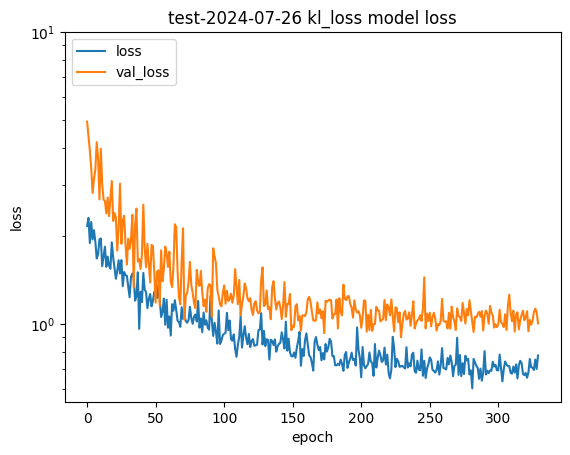

Val loss: 0.9004449844360352
Train loss: 0.7156391739845276
Test loss: 0.9377100467681885
dO18 RMSE: 1.0961140155924092
Driver: GTiff/GeoTIFF
Size is 941 x 937 x 12
Projection is GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
Origin = (-74.0000000000241, 5.29166666665704)
Pixel Size = (0.04166666666665718, -0.04166666666667143)
Driver: GTiff/GeoTIFF
Size is 941 x 937 x 12
Projection is GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
Origin = (-74.0000000000241, 5.29166666665704)
Pixel

 62%|██████▏   | 634/1024 [01:30<01:28,  4.39it/s]

In [ ]:
tvim.train_variational_inference_model(params, fileset, ISOSCAPE_SAVE_LOCATION, MODEL_SAVE_LOCATION)